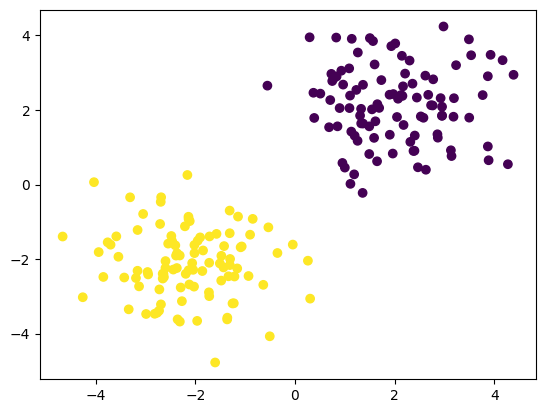

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# generation de données aléatoires pour deux groupes

np.random.seed(0)
x1= np.random.randn(100,2)  +  np.array([2,2])   #je genere 100 valeurs, 2 colonnes et j'ajoute 2 pour décaler
x2= np.random.randn(100,2)  +  np.array([-2, -2])

# creation d'un tableau de labels pour chaque groupe

y1 = np.zeros(100)
y2 = np.ones(100)

# fusion des données et des labels

x = np.vstack([x1,x2])         #fusionner pour avoir notre X
y = np.concatenate([y1,y2])

#tracé des données

plt.scatter(x[:,0],x[:,1], c=y)
plt.show()

regression logistique from scratch

In [11]:
#ajout d'un biais aux données x

x_bias= np.c_[np.ones(x.shape[0]),x]     #[1,x11,x12] une manière d'écrire / w0 biaisé à 1.

#initialisation des poids (coeffs) du modèle

w= np.zeros(x_bias.shape[1])   #initialiser les poids à 0, 0, 0




array([0., 0., 0.])

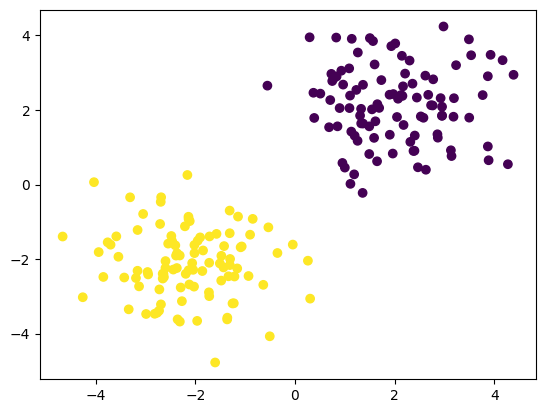

In [14]:
#définition du taux d'apprentissage (learning rate) et nbr d'itérations

learning_rate = 0.1  #hyperparamater
num_iterations = 1000

#Entrainement du regression logistique

for i in range(num_iterations):
  # calcul de la prédiction du modèle (sigmaoide)
  z= np.dot(x_bias,w)
  y_pred = 1/(1+ np.exp(-z))

  #calcul du gradient
  gradient = np.dot(x_bias.T,(y_pred-y))/y.size

  #mise à jour des poids

  w-=learning_rate * gradient

#tracé des données

plt.scatter(x[:,0],x[:,1],c=y)

In [15]:
x_bias[0]

array([1.        , 3.76405235, 2.40015721])

In [16]:
w  #il s'est entrainé et il trouve ce w

array([-0.12372611, -1.93405985, -1.90621262])

In [17]:
# testant le modèle sur une donnée du data.. par exemple la donnée x_bias[0] (c une donnée d'entrainement )

z= np.dot(x_bias[0],w)
y_pred = 1/(1+ np.exp(-z))
y_pred
#proba très faible  < 50percent donc la classe 0 qui est bien le cas.

6.275578601716134e-06

In [18]:
#en va donner une donnée de test (jamais vu)
x_test = [1. , 4. , 3.]
z= np.dot(x_test,w)
y_pred = 1/(1+ np.exp(-z))
y_pred


1.2673218746105791e-06

In [19]:
x_test = [1. ,-3. , -2.]
z= np.dot(x_test,w)
y_pred = 1/(1+ np.exp(-z))
y_pred

0.9999244680050028

In [21]:
x_test = [1. ,0. , 1.]
z= np.dot(x_test,w)
y_pred = 1/(1+ np.exp(-z))
y_pred

0.1160952093523527

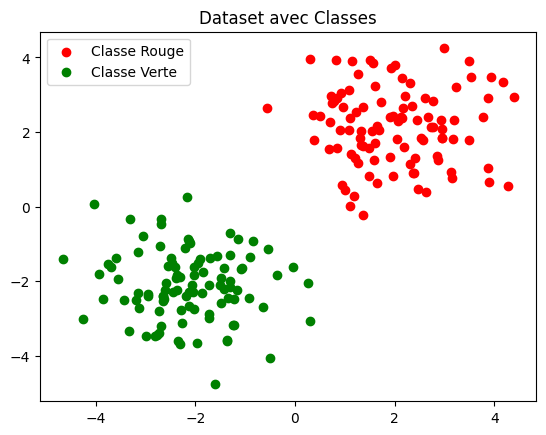

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Pour (x0, x1) = (1.5, 1.5), la prédiction est : Classe Rouge
Accuracy : 1.0
Precision : 1.0
Recall : 1.0
R^2 Score : 1.0


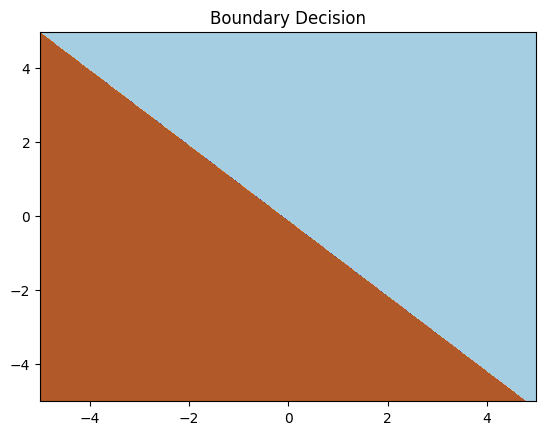

In [26]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, r2_score

# Création d'un DataFrame avec deux classes (classe rouge et classe verte)
data = pd.DataFrame(np.vstack([x1, x2]), columns=["x0", "x1"])
data["class"] = np.concatenate([y1, y2])

# Visualisation du dataset
plt.scatter(data[data["class"] == 0]["x0"], data[data["class"] == 0]["x1"], c="red", label="Classe Rouge")
plt.scatter(data[data["class"] == 1]["x0"], data[data["class"] == 1]["x1"], c="green", label="Classe Verte")
plt.legend()
plt.title("Dataset avec Classes")
plt.show()

# Entraînement du modèle de régression logistique
model = LogisticRegression()
model.fit(data[["x0", "x1"]], data["class"])

# Fonction pour prédire la classe en fonction de (x0, x1)
def predict_class(x0, x1):
    prediction = model.predict([[x0, x1]])
    if prediction[0] == 0:
        return "Classe Rouge"
    else:
        return "Classe Verte"

# Exemple de prédiction
x0 = 1.5
x1 = 1.5
predicted_class = predict_class(x0, x1)
print(f"Pour (x0, x1) = ({x0}, {x1}), la prédiction est : {predicted_class}")

# Prédictions pour les données du dataset
data["predicted_class"] = model.predict(data[["x0", "x1"]])

# Calcul de l'accuracy, la précision, le recall, et le R^2 score
accuracy = accuracy_score(data["class"], data["predicted_class"])
precision = precision_score(data["class"], data["predicted_class"])
recall = recall_score(data["class"], data["predicted_class"])
r2 = r2_score(data["class"], data["predicted_class"])

print(f"Accuracy : {accuracy}")
print(f"Precision : {precision}")
print(f"Recall : {recall}")
print(f"R^2 Score : {r2}")

# Tracé de la "boundary decision"
xx, yy = np.meshgrid(np.arange(-5, 5, 0.01), np.arange(-5, 5, 0.01))
X_boundary = np.c_[xx.ravel(), yy.ravel()]
Z = model.predict(X_boundary)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.title("Boundary Decision")
plt.show()


cas de data non séparées

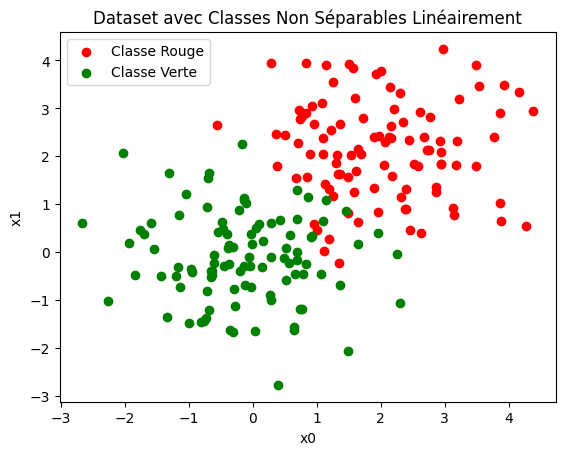

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Pour (x0, x1) = (1.5, 1.5), la prédiction est : Classe Rouge
Accuracy : 0.94
Precision : 0.9489795918367347
Recall : 0.93
R^2 Score : 0.76


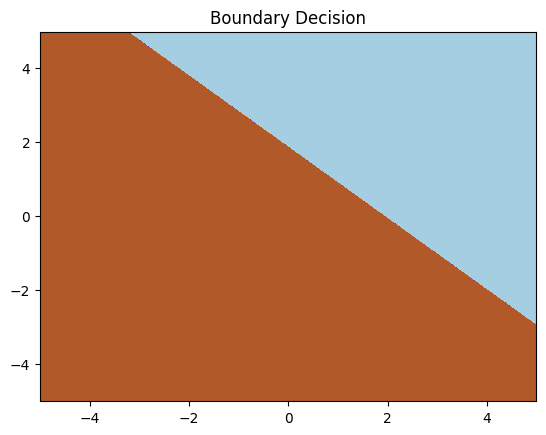

In [27]:
np.random.seed(0)
X1 = np.random.randn(100, 2) + np.array([2, 2])
X2 = np.random.randn(100, 2) + np.array([0, 0])
Y1 = np.zeros(100)
Y2 = np.ones(100)

# Création d'un DataFrame avec deux classes (classe rouge et classe verte)
data = pd.DataFrame(np.vstack([X1, X2]), columns=["x0", "x1"])
data["class"] = np.concatenate([Y1, Y2])

# Visualisation du dataset
plt.scatter(data[data["class"] == 0]["x0"], data[data["class"] == 0]["x1"], c="red", label="Classe Rouge")
plt.scatter(data[data["class"] == 1]["x0"], data[data["class"] == 1]["x1"], c="green", label="Classe Verte")
plt.legend()
plt.title("Dataset avec Classes Non Séparables Linéairement")
plt.xlabel("x0")
plt.ylabel("x1")
plt.show()

# Entraînement du modèle de régression logistique
model = LogisticRegression()
model.fit(data[["x0", "x1"]], data["class"])

# Fonction pour prédire la classe en fonction de (x0, x1)
def predict_class(x0, x1):
    prediction = model.predict([[x0, x1]])
    if prediction[0] == 0:
        return "Classe Rouge"
    else:
        return "Classe Verte"

# Exemple de prédiction
x0 = 1.5
x1 = 1.5
predicted_class = predict_class(x0, x1)
print(f"Pour (x0, x1) = ({x0}, {x1}), la prédiction est : {predicted_class}")

# Prédictions pour les données du dataset
data["predicted_class"] = model.predict(data[["x0", "x1"]])

# Calcul de l'accuracy, la précision, le recall, et le R^2 score
accuracy = accuracy_score(data["class"], data["predicted_class"])
precision = precision_score(data["class"], data["predicted_class"])
recall = recall_score(data["class"], data["predicted_class"])
r2 = r2_score(data["class"], data["predicted_class"])

print(f"Accuracy : {accuracy}")
print(f"Precision : {precision}")
print(f"Recall : {recall}")
print(f"R^2 Score : {r2}")

# Tracé de la "boundary decision"
xx, yy = np.meshgrid(np.arange(-5, 5, 0.01), np.arange(-5, 5, 0.01))
X_boundary = np.c_[xx.ravel(), yy.ravel()]
Z = model.predict(X_boundary)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.title("Boundary Decision")
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


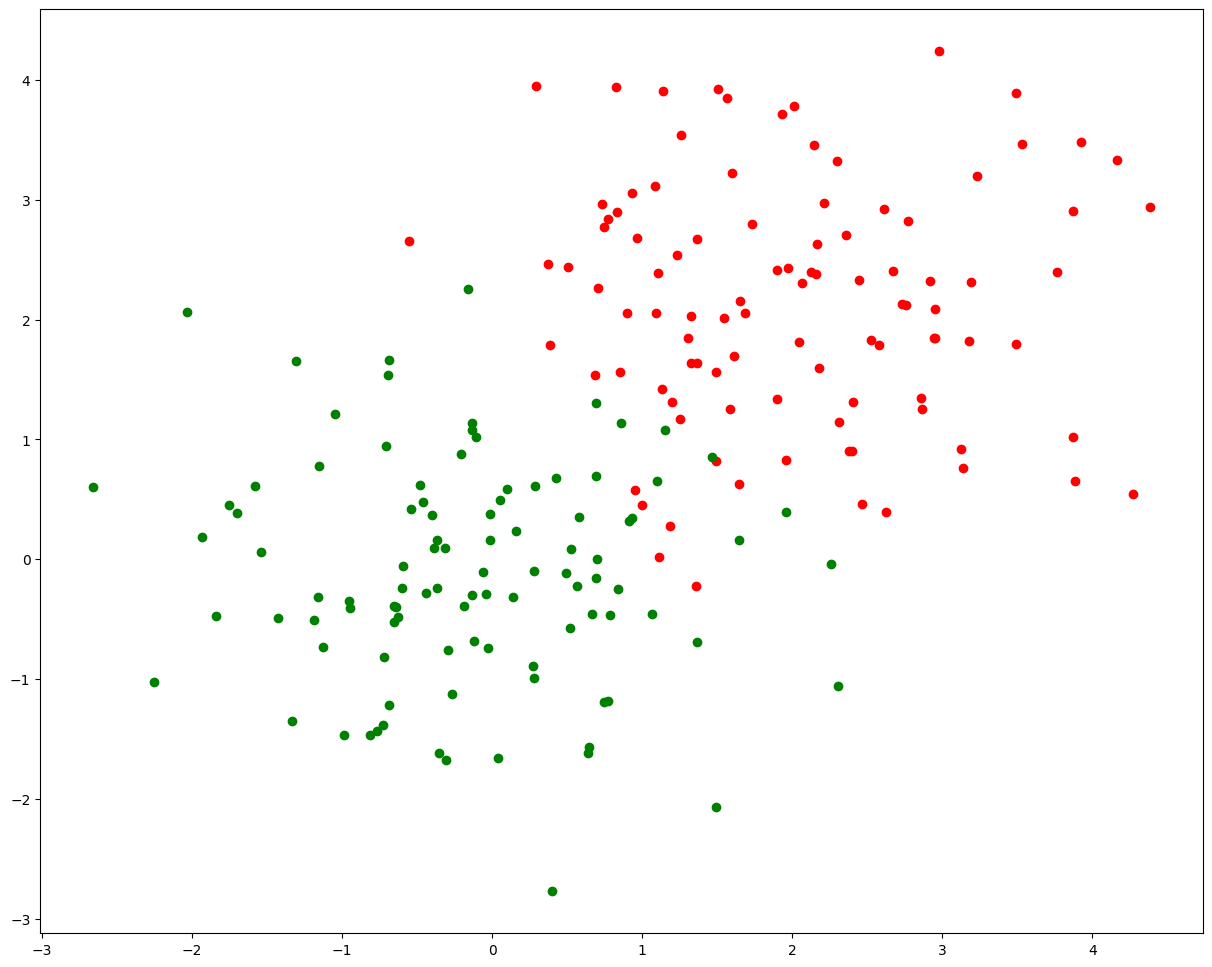

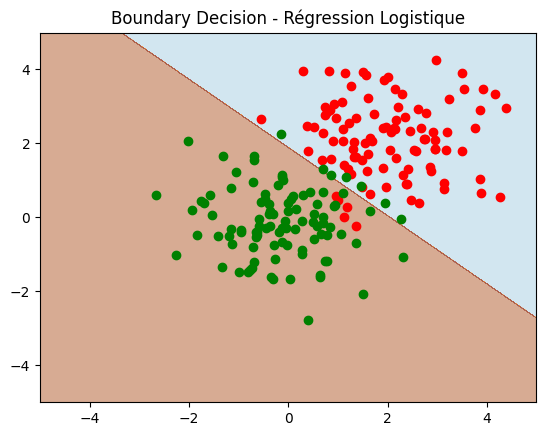

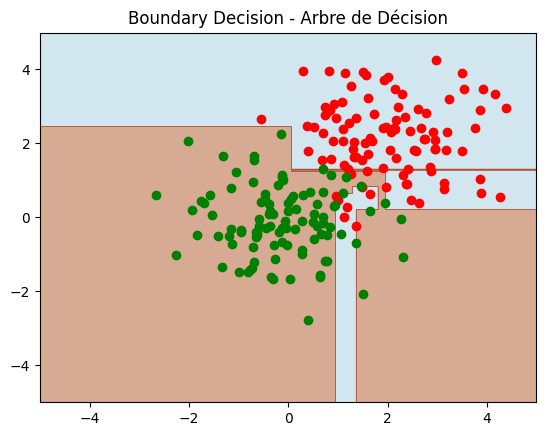

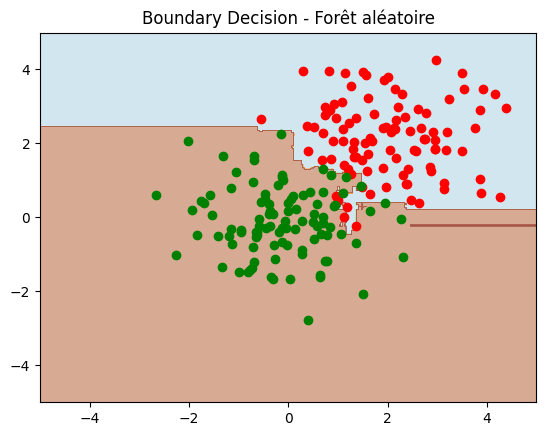

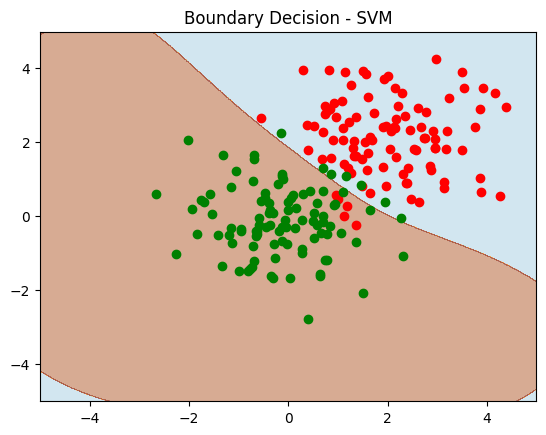

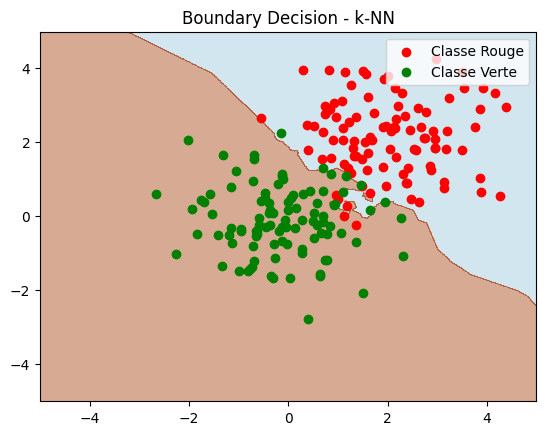

In [29]:
#cas d'autres algo de classification

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, r2_score
from sklearn.model_selection import train_test_split

# Génération du dataset
np.random.seed(0)
X1 = np.random.randn(100, 2) + np.array([2, 2])
X2 = np.random.randn(100, 2) + np.array([0, 0])
Y1 = np.zeros(100)
Y2 = np.ones(100)

# Création d'un DataFrame avec deux classes (classe rouge et classe verte)
data = pd.DataFrame(np.vstack([X1, X2]), columns=["x0", "x1"])
data["class"] = np.concatenate([Y1, Y2])

# Séparation des données en features (X) et target (y)
X = data[["x0", "x1"]]
y = data["class"]

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialisation des modèles
models = {
    "Régression Logistique": LogisticRegression(),
    "Arbre de Décision": DecisionTreeClassifier(),
    "Forêt aléatoire": RandomForestClassifier(),
    "SVM": SVC(),
    "k-NN": KNeighborsClassifier()
}

# Tracé du dataset
plt.figure(figsize=(15, 12))
plt.scatter(data[data["class"] == 0]["x0"], data[data["class"] == 0]["x1"], c="red", label="Classe Rouge")
plt.scatter(data[data["class"] == 1]["x0"], data[data["class"] == 1]["x1"], c="green", label="Classe Verte")

# Boucle à travers les modèles
for model_name, model in models.items():
    model.fit(X_train, y_train)

    # Tracé de la "boundary decision"
    xx, yy = np.meshgrid(np.arange(-5, 5, 0.01), np.arange(-5, 5, 0.01))
    X_boundary = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(X_boundary)
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.5)
    plt.title(f"Boundary Decision - {model_name}")
    plt.scatter(data[data["class"] == 0]["x0"], data[data["class"] == 0]["x1"], c="red", label="Classe Rouge")
    plt.scatter(data[data["class"] == 1]["x0"], data[data["class"] == 1]["x1"], c="green", label="Classe Verte")

plt.legend(loc='upper right')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Tableau de Comparaison :
                       Accuracy  Precision    Recall  R^2 Score
Régression Logistique     0.975   0.950000  1.000000   0.899749
Arbre de Décision         0.950   0.947368  0.947368   0.799499
Forêt aléatoire           0.950   0.904762  1.000000   0.799499
SVM                       0.975   0.950000  1.000000   0.899749
k-NN                      0.975   0.950000  1.000000   0.899749


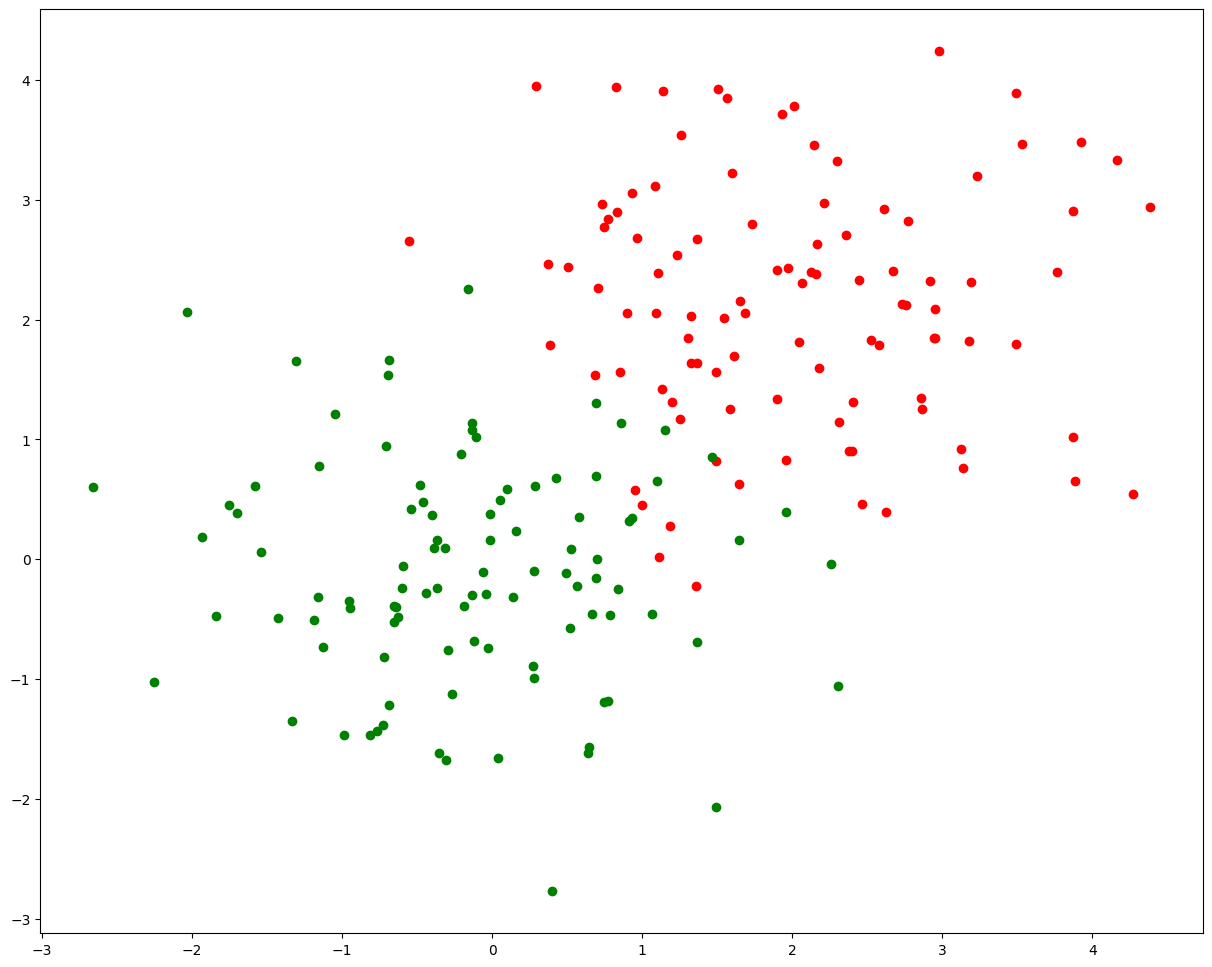

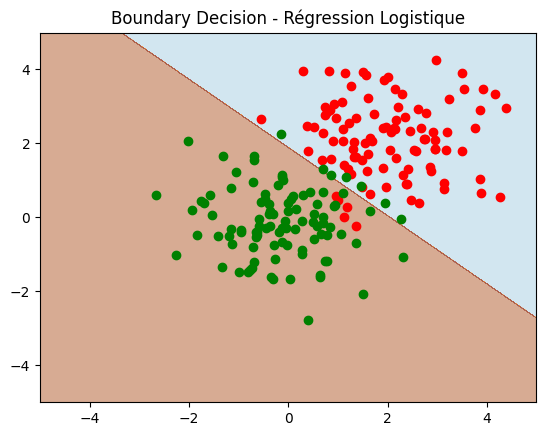

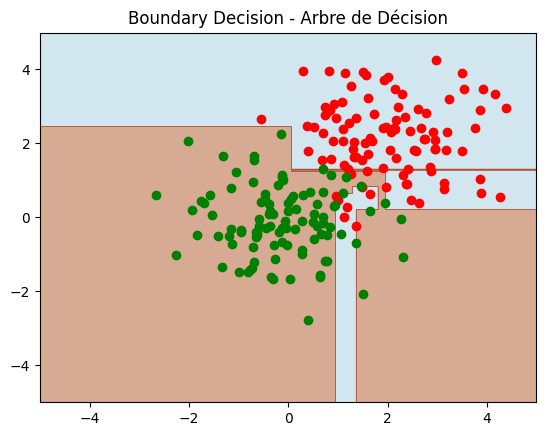

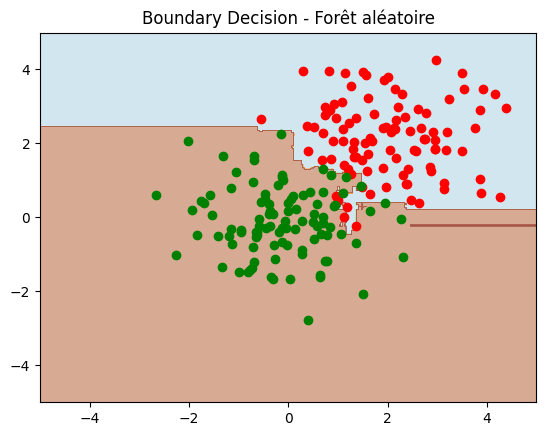

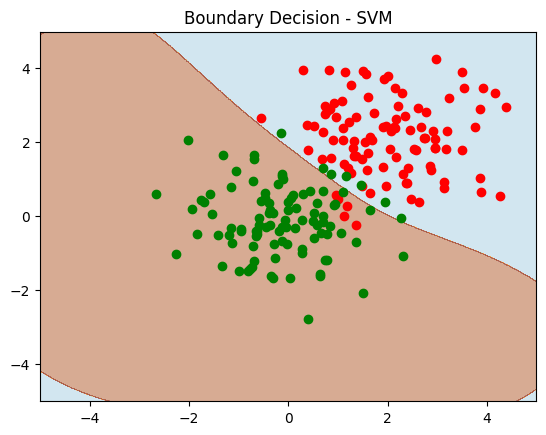

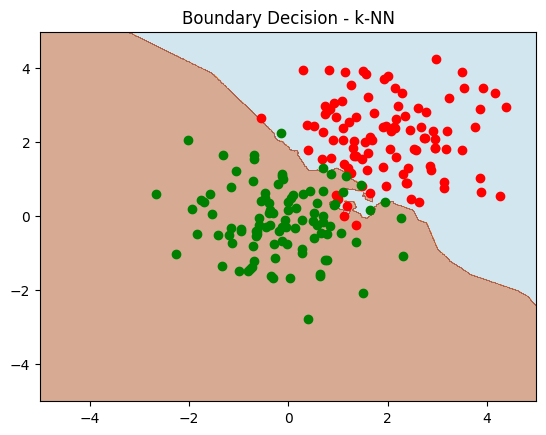

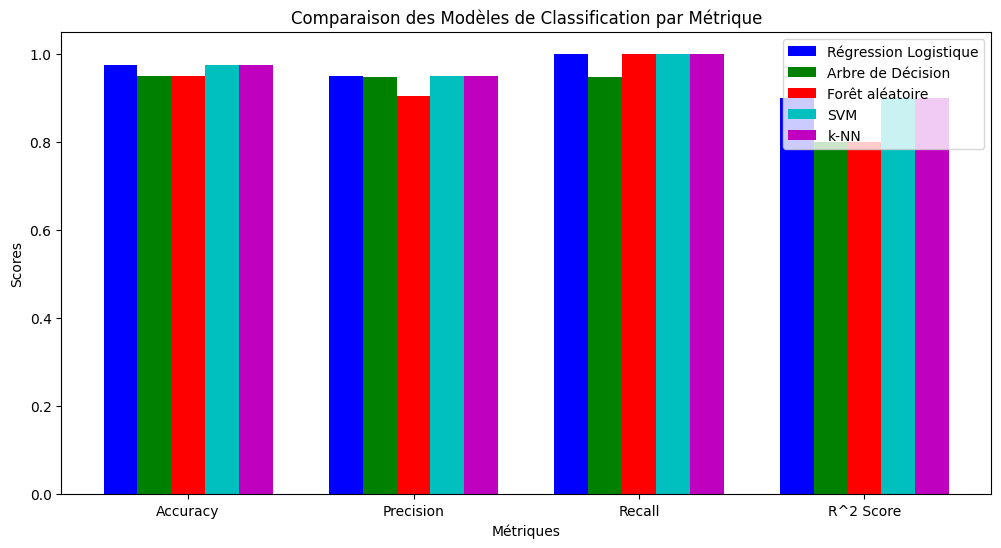

In [32]:
def generate_and_plot_dataset():
    np.random.seed(0)
    X1 = np.random.randn(100, 2) + np.array([2, 2])
    X2 = np.random.randn(100, 2) + np.array([0, 0])
    Y1 = np.zeros(100)
    Y2 = np.ones(100)

    data = pd.DataFrame(np.vstack([X1, X2]), columns=["x0", "x1"])
    data["class"] = np.concatenate([Y1, Y2])

    plt.figure(figsize=(15, 12))
    plt.scatter(data[data["class"] == 0]["x0"], data[data["class"] == 0]["x1"], c="red", label="Classe Rouge")
    plt.scatter(data[data["class"] == 1]["x0"], data[data["class"] == 1]["x1"], c="green", label="Classe Verte")
    return data
def plot_decision_boundary(model, data, title):
    xx, yy = np.meshgrid(np.arange(-5, 5, 0.01), np.arange(-5, 5, 0.01))
    X_boundary = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(X_boundary)
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.5)
    plt.title(title)
    plt.scatter(data[data["class"] == 0]["x0"], data[data["class"] == 0]["x1"], c="red", label="Classe Rouge")
    plt.scatter(data[data["class"] == 1]["x0"], data[data["class"] == 1]["x1"], c="green", label="Classe Verte")

def train_and_compare_models(data):
    X = data[["x0", "x1"]]
    y = data["class"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    models = {
        "Régression Logistique": LogisticRegression(),
        "Arbre de Décision": DecisionTreeClassifier(),
        "Forêt aléatoire": RandomForestClassifier(),
        "SVM": SVC(),
        "k-NN": KNeighborsClassifier()
    }

    colors = ['b', 'g', 'r', 'c', 'm']
    metrics = ["Accuracy", "Precision", "Recall", "R^2 Score"]

    model_names = list(models.keys())
    scores = {metric: [] for metric in metrics}

    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        scores["Accuracy"].append(accuracy)
        scores["Precision"].append(precision)
        scores["Recall"].append(recall)
        scores["R^2 Score"].append(r2)

        plot_decision_boundary(model, data, f"Boundary Decision - {model_name}")

    comparison_df = pd.DataFrame(scores, index=model_names)

    print("Tableau de Comparaison :")
    print(comparison_df)

    plt.figure(figsize=(12, 6))
    for i, model_name in enumerate(model_names):
        model_scores = [scores[metric][i] for metric in metrics]
        plt.bar(np.arange(len(metrics)) + i * 0.15, model_scores, width=0.15, label=model_name, color=colors[i])

    plt.xlabel('Métriques')
    plt.ylabel('Scores')
    plt.title('Comparaison des Modèles de Classification par Métrique')
    plt.xticks(np.arange(len(metrics)) + 0.3, metrics)
    plt.legend()
    plt.show()

data = generate_and_plot_dataset()
train_and_compare_models(data)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


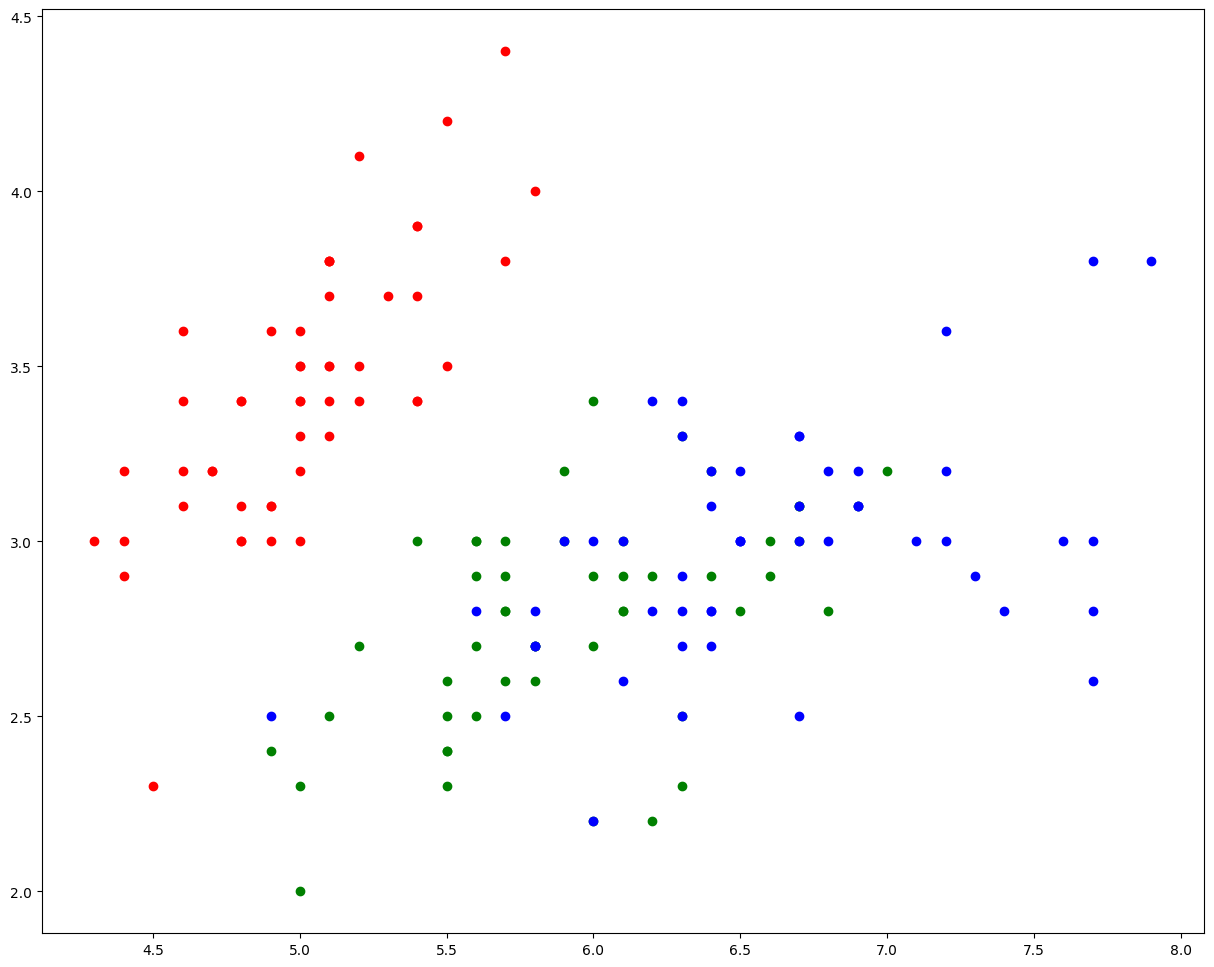

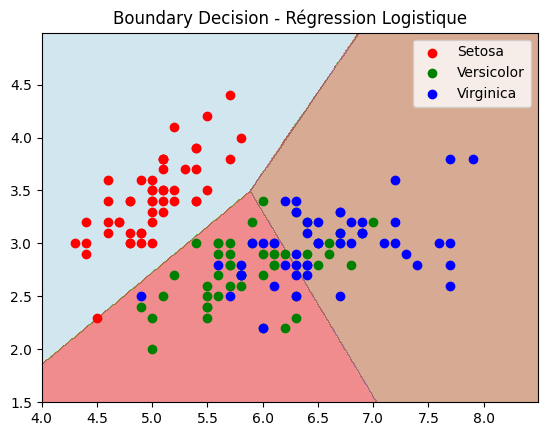

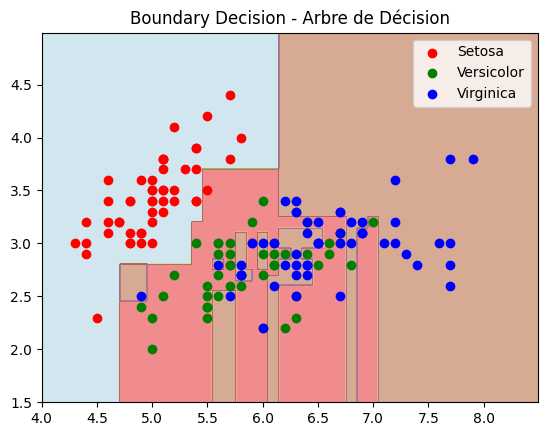

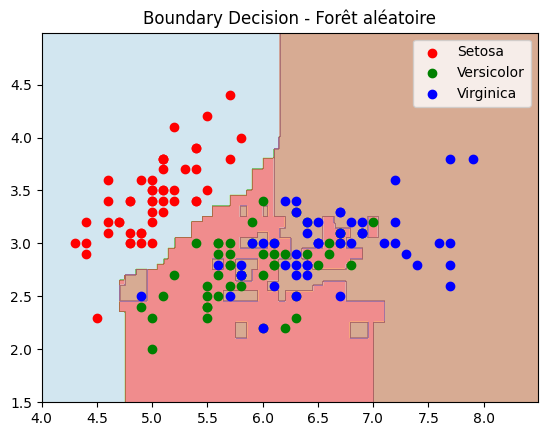

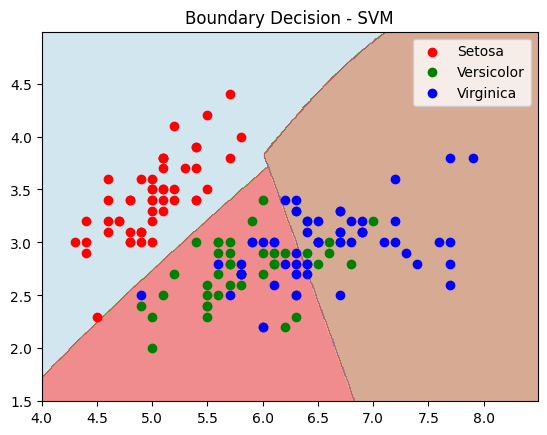

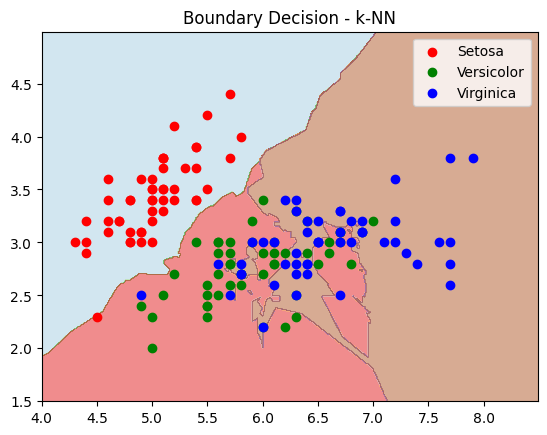

In [33]:
from sklearn.datasets import load_iris

# Chargement du dataset Iris
iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data["class"] = iris.target

# Diviser les données en features (X) et target (y)
X = data[["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"]]
y = data["class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialisation des modèles
models = {
    "Régression Logistique": LogisticRegression(max_iter=1000),
    "Arbre de Décision": DecisionTreeClassifier(),
    "Forêt aléatoire": RandomForestClassifier(),
    "SVM": SVC(),
    "k-NN": KNeighborsClassifier()
}

# Noms des classes
class_names = ["Setosa", "Versicolor", "Virginica"]

# Fonction pour tracé de la "boundary decision" à trois classes
def plot_decision_boundary_3_classes(model, data, title):
    xx, yy = np.meshgrid(np.arange(4, 8.5, 0.01), np.arange(1.5, 5, 0.01))
    X_boundary = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(X_boundary)
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.5)
    plt.title(title)
    for class_label, color in zip(range(3), ["red", "green", "blue"]):
        plt.scatter(data[data["class"] == class_label]["sepal length (cm)"],
                    data[data["class"] == class_label]["sepal width (cm)"],
                    c=color, label=class_names[class_label])

# Tracé du dataset
plt.figure(figsize=(15, 12))
for class_label, color in zip(range(3), ["red", "green", "blue"]):
    plt.scatter(data[data["class"] == class_label]["sepal length (cm)"],
                data[data["class"] == class_label]["sepal width (cm)"],
                c=color, label=class_names[class_label])

# Boucle à travers les modèles
for model_name, model in models.items():
    model.fit(X_train[["sepal length (cm)", "sepal width (cm)"]], y_train)  # Utilisez les 2 caractéristiques ici
    plot_decision_boundary_3_classes(model, data, f"Boundary Decision - {model_name}")
    plt.legend(loc='upper right')

plt.show()